In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [38]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [39]:
data.shape

(158, 12)

In [40]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [41]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [42]:
print(data.duplicated().value_counts())

False    158
dtype: int64


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [44]:
data["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [45]:
data1 = pd.get_dummies(data["Region"], drop_first=True)
df= pd.concat([data1,data], axis=1)
df.head()

,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe,Country,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,0,0,0,0,0,0,0,1,Switzerland,...,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,0,0,0,0,0,0,0,1,Iceland,...,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,0,0,0,0,0,0,0,1,Denmark,...,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,0,0,0,0,0,0,0,1,Norway,...,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,0,0,0,1,0,0,0,0,Canada,...,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
df.drop(columns=["Country","Region","Happiness Rank"],inplace=True)
df.head()

,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,0,0,0,0,0,0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,0,0,0,0,0,0,0,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,0,0,0,0,0,0,0,1,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,0,0,0,0,0,0,0,1,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0,0,0,0,1,0,0,0,0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


-0.3175746523312048

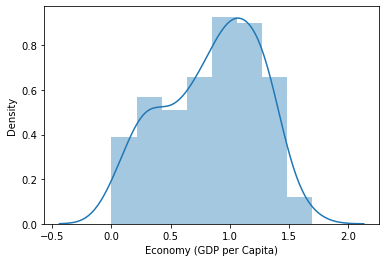

In [11]:
sns.distplot(df["Economy (GDP per Capita)"])
df["Economy (GDP per Capita)"].skew()

<AxesSubplot:>

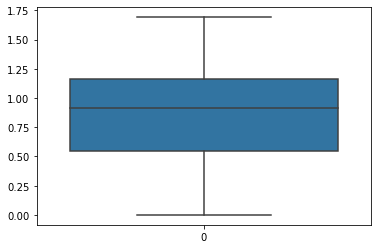

In [12]:
sns.boxplot(data=df["Economy (GDP per Capita)"])

1.9834393956708816

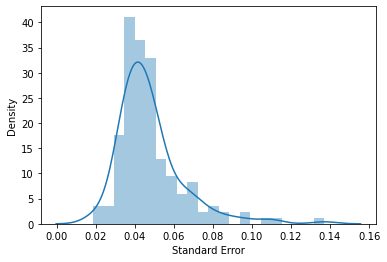

In [13]:
sns.distplot(df["Standard Error"])
df["Standard Error"].skew()

<AxesSubplot:>

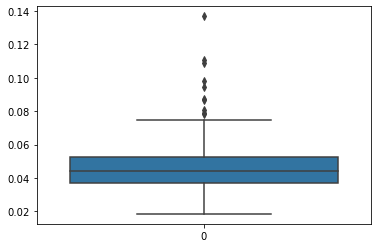

In [14]:
sns.boxplot(data=df["Standard Error"])

-1.0068931265421133

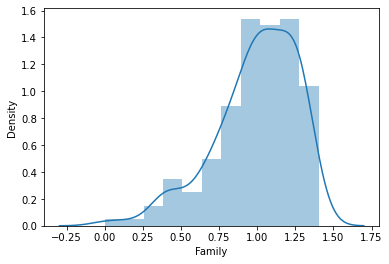

In [15]:
sns.distplot(df["Family"])
df["Family"].skew()

<AxesSubplot:>

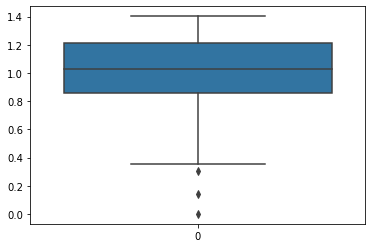

In [16]:
sns.boxplot(data=df["Family"])

-0.7053284856924459

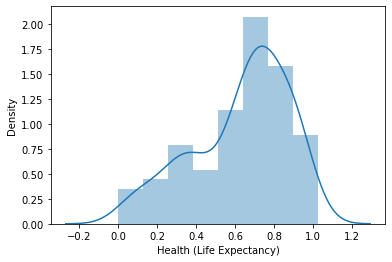

In [17]:
sns.distplot(df["Health (Life Expectancy)"])
df["Health (Life Expectancy)"].skew()

<AxesSubplot:>

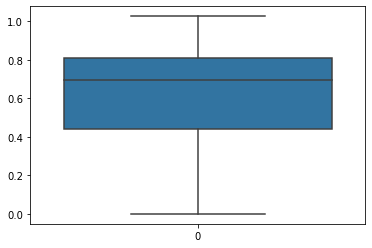

In [18]:
sns.boxplot(data=df["Health (Life Expectancy)"])

-0.41346197289710274

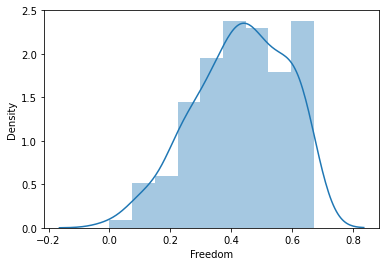

In [19]:
sns.distplot(df["Freedom"])
df["Freedom"].skew()

<AxesSubplot:>

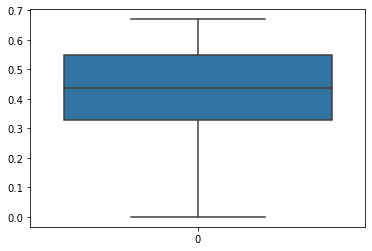

In [20]:
sns.boxplot(data=df["Freedom"])

1.3854625954673152

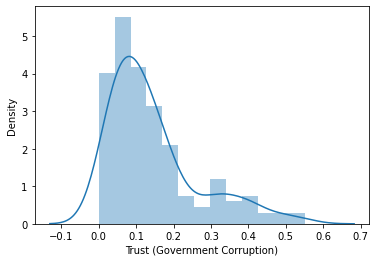

In [21]:
sns.distplot(df["Trust (Government Corruption)"])
df["Trust (Government Corruption)"].skew()

<AxesSubplot:>

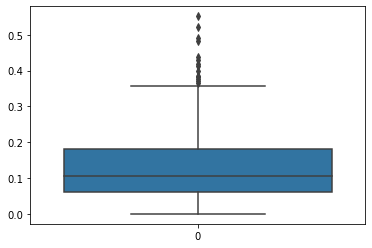

In [22]:
sns.boxplot(data=df["Trust (Government Corruption)"])

1.001960575563042

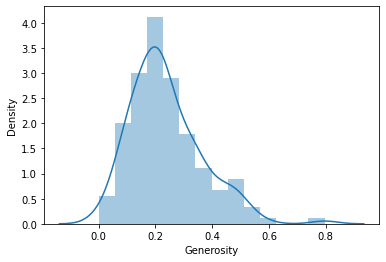

In [23]:
sns.distplot(df["Generosity"])
df["Generosity"].skew()

<AxesSubplot:>

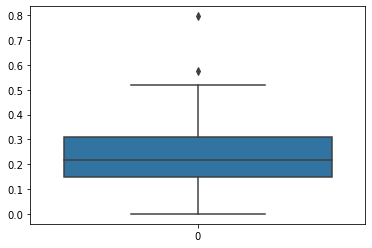

In [24]:
sns.boxplot(data=df["Generosity"])

-0.23891080938012677

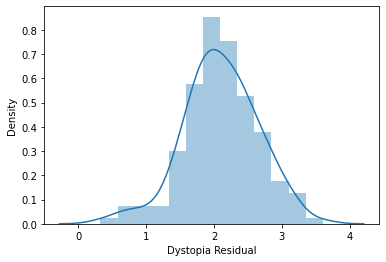

In [25]:
sns.distplot(df["Dystopia Residual"])
df["Dystopia Residual"].skew()

<AxesSubplot:>

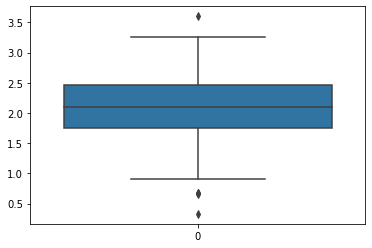

In [26]:
sns.boxplot(data=df["Dystopia Residual"])

In [47]:
from scipy.stats import zscore
df.columns

Index(['Central and Eastern Europe', 'Eastern Asia',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'North America', 'Southeastern Asia', 'Southern Asia',
       'Sub-Saharan Africa', 'Western Europe', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [48]:
#Removing the outliers using the z-score.

z_score= zscore(df[['Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom',
                    'Trust (Government Corruption)','Generosity','Dystopia Residual']])
abs_zscore= np.abs(z_score)
filtering_entry= (abs_zscore<3).all(axis=1)
df_final=df[filtering_entry]
df_final.shape

(149, 18)

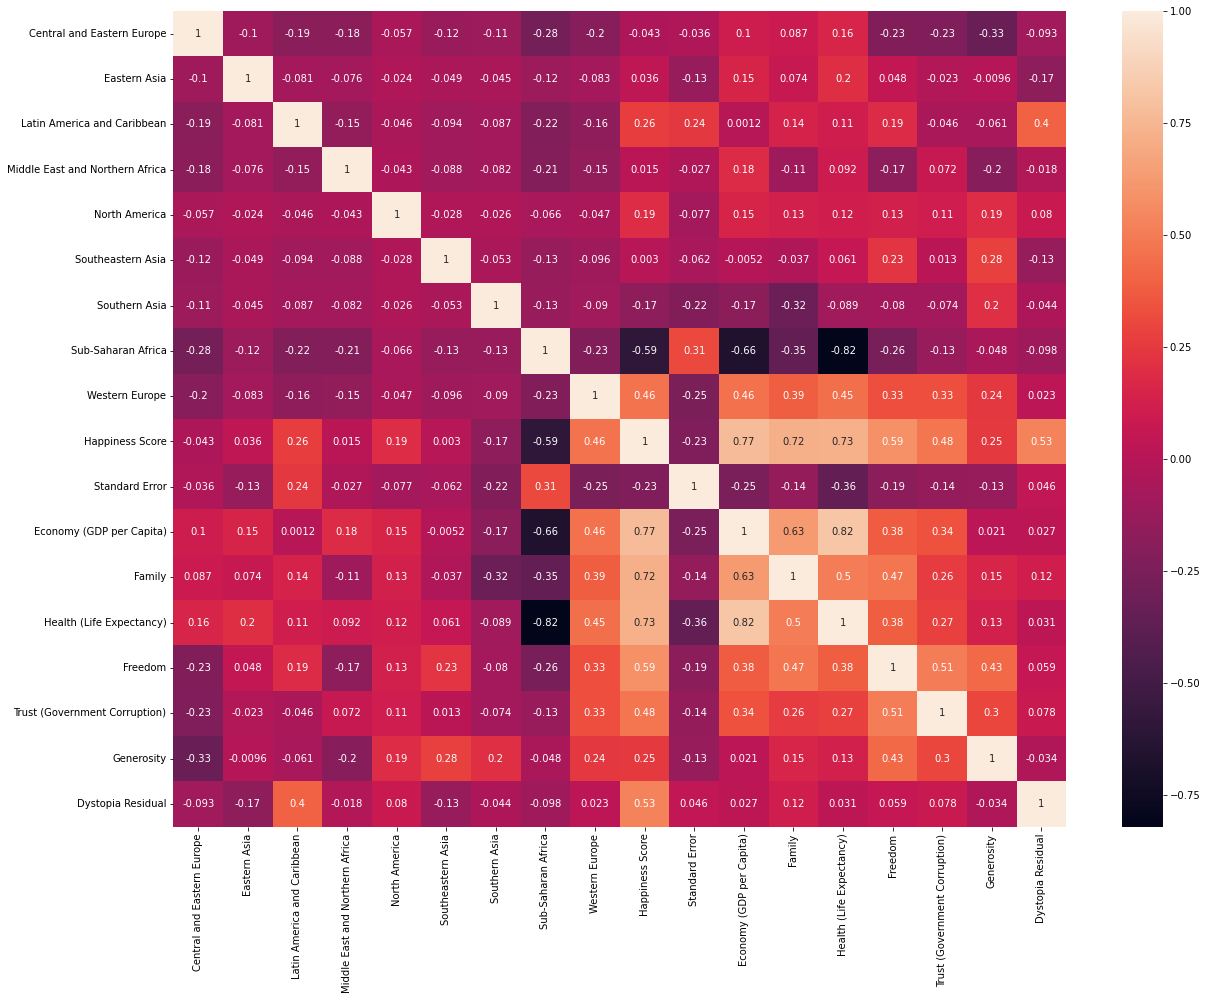

In [49]:
corr= df_final.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot= True, )
plt.show()

In [50]:
X= df_final.drop(columns=["Happiness Score"])
y= df_final["Happiness Score"]

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=356)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr= LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
accuracy_train = metrics.r2_score(y_train,y_pred_train)
print("Training Score: ",accuracy_train*100)

y_pred= lr.predict(x_test)
accuracy_test = metrics.r2_score(y_test,y_pred)
print("Testing Score",accuracy_test*100)

Training Score:  99.99999455590583
Testing Score 99.99999155520655


In [54]:
from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", cv_score*100)

the cv score for 5 fold: 99.99979328469868
the cv score for 6 fold: 99.99970179282337
the cv score for 7 fold: 99.99950882839407
the cv score for 8 fold: 99.99946597661919
the cv score for 9 fold: 99.99931564942845
